## Part 1
- Overview
- Demo
- Model overview
- Preloaded model & tokenizer
- Quick test

## Part 2
- Update model
- Load dataset
- Data formatting loader

## Part 3
- Training
- Testing
- Recreate demo

# Download Modules

In [ ]:
!pip install transformers sentencepiece datasets

# Steps
1. Load the pretrained model and tokenizer
2. Load dataset
3. Transform dataset into input (entails a minor model change)
4. Train/finetune the model on our dataset
5. Test the model

# Test Tokenizer

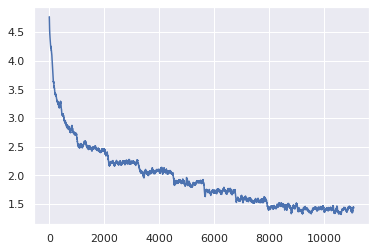

In [ ]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

# Manual Testing

Datasets loaded successfully.

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36530 entries, 0 to 36529
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENTITY_ID           36530 non-null  int64  
 1   CATEGORY_ID         36530 non-null  int64  
 2   ENTITY_LENGTH       36530 non-null  float64
 3   ENTITY_DESCRIPTION  36530 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ MB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ENTITY_ID           20000 non-null  int64 
 1   CATEGORY_ID         20000 non-null  int64 
 2   ENTITY_DESCRIPTION  20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB

Missing values in Train Dataset:
No missing values found in the 

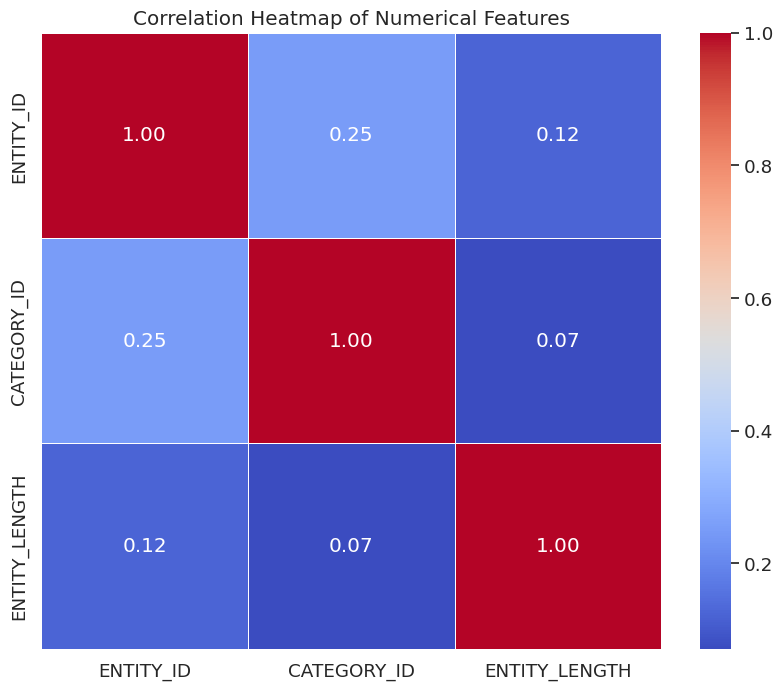

Column 'length' not found in the dataset. Skipping boxplot analysis.
Column 'description' not found for feature engineering.


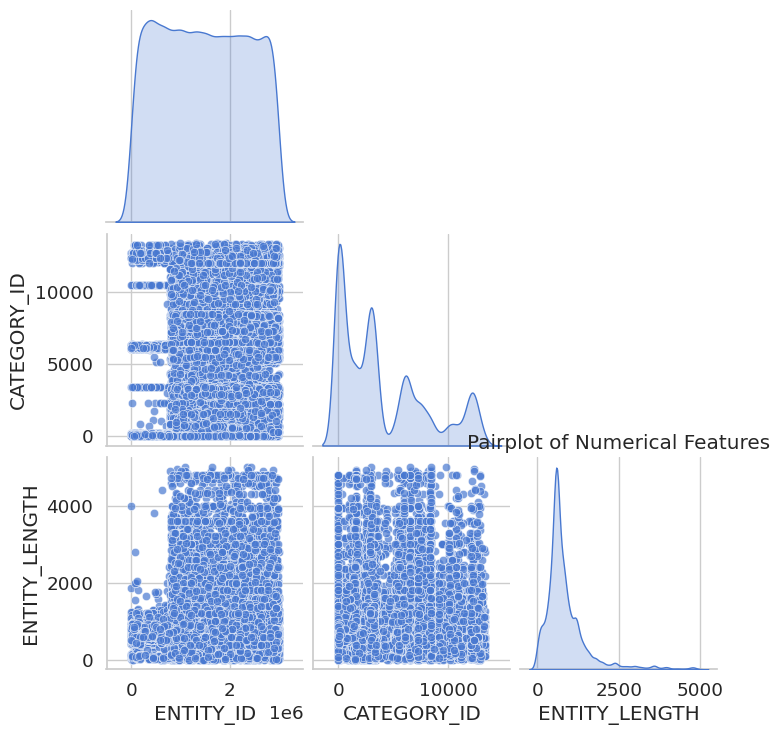

Skipping ENTITY_DESCRIPTION: too many unique values for a meaningful count plot.
Target variable 'your_actual_target_column_name' not found.
EDA results have been saved to files. Please check the current directory.


In [ ]:



















# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set plot style for consistency
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Function to clean CSV lines
def clean_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    with open(file_path, 'w') as file:
        for line in lines:
            if line.count('"') % 2 == 0:  # Ensure quotes are even
                file.write(line)

# Clean CSV files before loading
clean_csv('/content/Train.csv')
clean_csv('/content/Test.csv')

# Load datasets with error handling
try:
    train_df = pd.read_csv('/content/Train.csv')
    test_df = pd.read_csv('/content/Test.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file path and ensure the dataset exists.")
    raise SystemExit(e)

# Step 1: Data Overview - Basic Info and Missing Values Check
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()

# Show missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

# Save missing values report
missing_values_report = pd.DataFrame({
    'Train': missing_values_train,
    'Test': missing_values_test
}).fillna(0)

missing_values_report.to_csv('missing_values_report.csv')

print("\nMissing values in Train Dataset:")
print(missing_values_train[missing_values_train > 0]) if missing_values_train.sum() > 0 else print("No missing values found in the train dataset.")

print("\nMissing values in Test Dataset:")
print(missing_values_test[missing_values_test > 0]) if missing_values_test.sum() > 0 else print("No missing values found in the test dataset.")

# Step 2: Handling missing values - Fill missing values with empty strings
train_df.fillna('', inplace=True)
test_df.fillna('', inplace=True)

# Step 3: EDA - Target Variable Analysis (Length Distribution)
if 'length' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df['length'], kde=True, color='blue', bins=30)
    plt.title('Distribution of Length in Train Dataset')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.axvline(train_df['length'].mean(), color='red', linestyle='--', label='Mean Length')
    plt.legend()
    plt.savefig('length_distribution.png')  # Save the plot
    plt.show()
else:
    print("Column 'length' not found in the dataset. Skipping length analysis.")

# Step 4: EDA - Description and Metadata Text Analysis
if 'description' in train_df.columns and 'metadata' in train_df.columns:
    combined_text = ' '.join(train_df['description'].astype(str) + ' ' + train_df['metadata'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(combined_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Descriptions and Metadata')
    plt.savefig('word_cloud.png')  # Save the word cloud
    plt.show()
else:
    print("Required columns for word cloud analysis are missing.")

# Step 5: Correlation Analysis for Numerical Metadata
numerical_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    corr_matrix = train_df[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.savefig('correlation_heatmap.png')  # Save the heatmap
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis.")

# Step 6: Outliers Detection - Boxplot of Length
if 'length' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df['length'], color='orange')
    plt.title('Boxplot of Length (Outliers Detection)')
    plt.xlabel('Length')
    plt.savefig('length_boxplot.png')  # Save the boxplot
    plt.show()
else:
    print("Column 'length' not found in the dataset. Skipping boxplot analysis.")

# Step 7: Feature Engineering - Length vs Description Length
if 'description' in train_df.columns:
    train_df['description_length'] = train_df['description'].apply(len)

    if 'length' in train_df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='description_length', y='length', data=train_df, color='green')
        plt.title('Description Length vs Length')
        plt.xlabel('Description Length')
        plt.ylabel('Entity Length')
        plt.savefig('description_length_vs_length.png')  # Save scatter plot
        plt.show()
    else:
        print("Column 'length' not found for scatter plot analysis.")
else:
    print("Column 'description' not found for feature engineering.")

# Step 8: Pair Plot of Numerical Features (if any available)
if len(numerical_columns) > 1:
    sns.pairplot(train_df[numerical_columns], corner=True, diag_kind='kde', plot_kws={'alpha': 0.7})
    plt.title('Pairplot of Numerical Features')
    plt.savefig('pairplot_numerical_features.png')  # Save pair plot
    plt.show()
else:
    print("Not enough numerical columns for pairplot analysis.")

# Step 9: Categorical Metadata Analysis - Frequency Plots
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    if train_df[column].nunique() < 50:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column, data=train_df, palette='Set2', order=train_df[column].value_counts().index)
        plt.title(f'Frequency Plot of {column}')
        plt.xticks(rotation=90)
        plt.savefig(f'frequency_plot_{column}.png')  # Save each frequency plot
        plt.show()
    else:
        print(f"Skipping {column}: too many unique values for a meaningful count plot.")

# Step 10: Target Variable Analysis
target_column = 'your_actual_target_column_name'  # Replace with actual target column name

if target_column in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target_column, data=train_df, palette='coolwarm')
    plt.title('Class Imbalance in Target Variable')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.savefig('target_variable_analysis.png')  # Save count plot
    plt.show()
else:
    print(f"Target variable '{target_column}' not found.")

# Save the processed data for further analysis
train_df.to_csv('processed_train_data.csv', index=False)
test_df.to_csv('processed_test_data.csv', index=False)

print("EDA results have been saved to files. Please check the current directory.")





















Datasets loaded successfully.

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36530 entries, 0 to 36529
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENTITY_ID           36530 non-null  int64  
 1   CATEGORY_ID         36530 non-null  int64  
 2   ENTITY_LENGTH       36530 non-null  float64
 3   ENTITY_DESCRIPTION  36530 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ MB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ENTITY_ID           20000 non-null  int64 
 1   CATEGORY_ID         20000 non-null  int64 
 2   ENTITY_DESCRIPTION  20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB

Missing values in Train Dataset:
No missing values found in the 

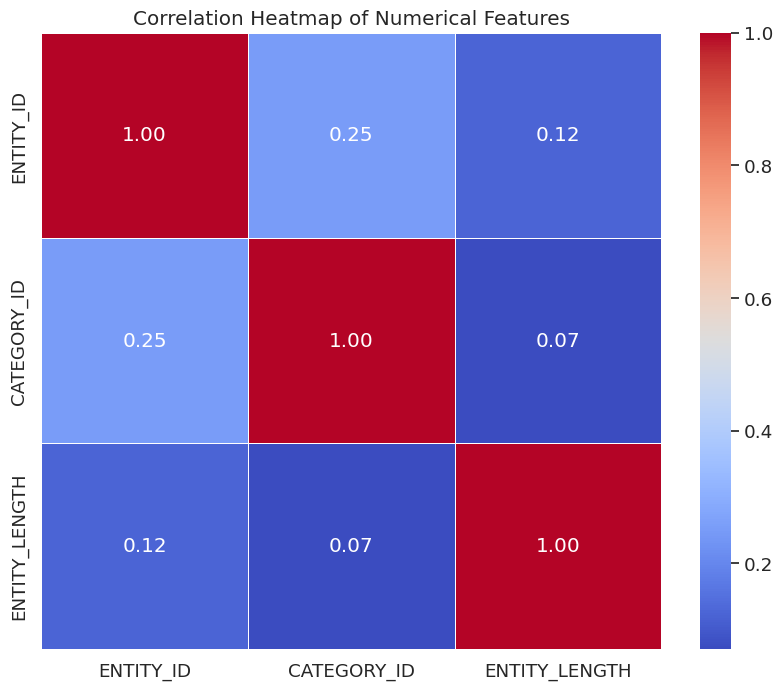

Column 'length' not found in the dataset. Skipping boxplot analysis.
Column 'description' not found for feature engineering.


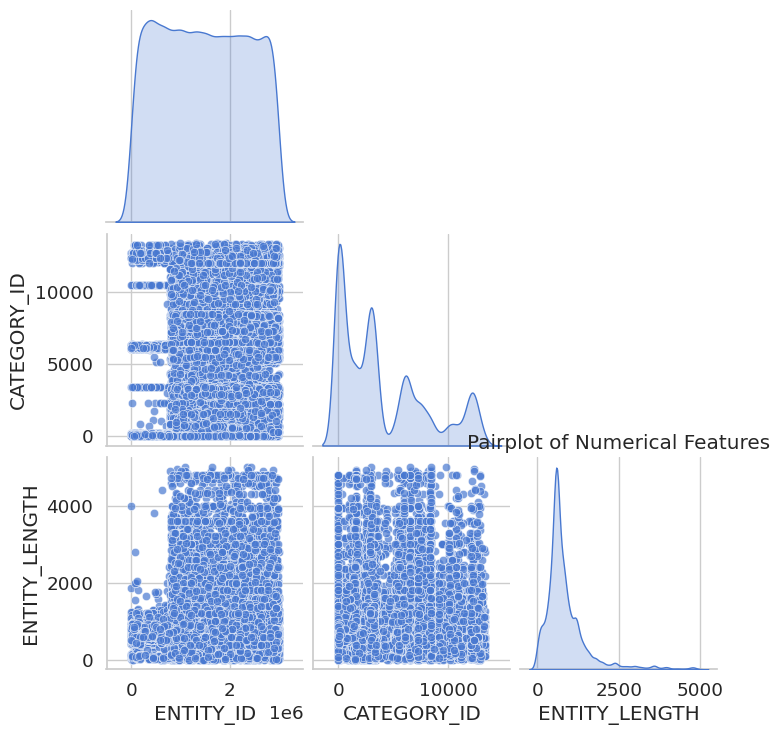

Skipping ENTITY_DESCRIPTION: too many unique values for a meaningful count plot.
Target variable 'your_actual_target_column_name' not found.
EDA results have been saved to files. Please check the current directory.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set plot style for consistency
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Function to clean CSV lines
def clean_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    with open(file_path, 'w') as file:
        for line in lines:
            if line.count('"') % 2 == 0:  # Ensure quotes are even
                file.write(line)

# Clean CSV files before loading
clean_csv('/content/Train.csv')
clean_csv('/content/Test.csv')

# Load datasets with error handling
try:
    train_df = pd.read_csv('/content/Train.csv')
    test_df = pd.read_csv('/content/Test.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file path and ensure the dataset exists.")
    raise SystemExit(e)

# Step 1: Data Overview - Basic Info and Missing Values Check
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()

# Show missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

# Save missing values report
missing_values_report = pd.DataFrame({
    'Train': missing_values_train,
    'Test': missing_values_test
}).fillna(0)

missing_values_report.to_csv('missing_values_report.csv')

print("\nMissing values in Train Dataset:")
print(missing_values_train[missing_values_train > 0]) if missing_values_train.sum() > 0 else print("No missing values found in the train dataset.")

print("\nMissing values in Test Dataset:")
print(missing_values_test[missing_values_test > 0]) if missing_values_test.sum() > 0 else print("No missing values found in the test dataset.")

# Step 2: Handling missing values - Fill missing values with empty strings
train_df.fillna('', inplace=True)
test_df.fillna('', inplace=True)

# Step 3: EDA - Target Variable Analysis (Length Distribution)
if 'length' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df['length'], kde=True, color='blue', bins=30)
    plt.title('Distribution of Length in Train Dataset')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.axvline(train_df['length'].mean(), color='red', linestyle='--', label='Mean Length')
    plt.legend()
    plt.savefig('length_distribution.png')  # Save the plot
    plt.show()
else:
    print("Column 'length' not found in the dataset. Skipping length analysis.")

# Step 4: EDA - Description and Metadata Text Analysis
if 'description' in train_df.columns and 'metadata' in train_df.columns:
    combined_text = ' '.join(train_df['description'].astype(str) + ' ' + train_df['metadata'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(combined_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Descriptions and Metadata')
    plt.savefig('word_cloud.png')  # Save the word cloud
    plt.show()
else:
    print("Required columns for word cloud analysis are missing.")

# Step 5: Correlation Analysis for Numerical Metadata
numerical_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    corr_matrix = train_df[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.savefig('correlation_heatmap.png')  # Save the heatmap
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis.")

# Step 6: Outliers Detection - Boxplot of Length
if 'length' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df['length'], color='orange')
    plt.title('Boxplot of Length (Outliers Detection)')
    plt.xlabel('Length')
    plt.savefig('length_boxplot.png')  # Save the boxplot
    plt.show()
else:
    print("Column 'length' not found in the dataset. Skipping boxplot analysis.")

# Step 7: Feature Engineering - Length vs Description Length
if 'description' in train_df.columns:
    train_df['description_length'] = train_df['description'].apply(len)

    if 'length' in train_df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='description_length', y='length', data=train_df, color='green')
        plt.title('Description Length vs Length')
        plt.xlabel('Description Length')
        plt.ylabel('Entity Length')
        plt.savefig('description_length_vs_length.png')  # Save scatter plot
        plt.show()
    else:
        print("Column 'length' not found for scatter plot analysis.")
else:
    print("Column 'description' not found for feature engineering.")

# Step 8: Pair Plot of Numerical Features (if any available)
if len(numerical_columns) > 1:
    sns.pairplot(train_df[numerical_columns], corner=True, diag_kind='kde', plot_kws={'alpha': 0.7})
    plt.title('Pairplot of Numerical Features')
    plt.savefig('pairplot_numerical_features.png')  # Save pair plot
    plt.show()
else:
    print("Not enough numerical columns for pairplot analysis.")

# Step 9: Categorical Metadata Analysis - Frequency Plots
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    if train_df[column].nunique() < 50:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column, data=train_df, palette='Set2', order=train_df[column].value_counts().index)
        plt.title(f'Frequency Plot of {column}')
        plt.xticks(rotation=90)
        plt.savefig(f'frequency_plot_{column}.png')  # Save each frequency plot
        plt.show()
    else:
        print(f"Skipping {column}: too many unique values for a meaningful count plot.")

# Step 10: Target Variable Analysis
target_column = 'your_actual_target_column_name'  # Replace with actual target column name

if target_column in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target_column, data=train_df, palette='coolwarm')
    plt.title('Class Imbalance in Target Variable')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.savefig('target_variable_analysis.png')  # Save count plot
    plt.show()
else:
    print(f"Target variable '{target_column}' not found.")

# Save the processed data for further analysis
train_df.to_csv('processed_train_data.csv', index=False)
test_df.to_csv('processed_test_data.csv', index=False)

print("EDA results have been saved to files. Please check the current directory.")



Datasets loaded successfully.

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENTITY_ID           99998 non-null  int64  
 1   CATEGORY_ID         99998 non-null  int64  
 2   ENTITY_LENGTH       99998 non-null  float64
 3   ENTITY_DESCRIPTION  99998 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ENTITY_ID           20000 non-null  int64 
 1   CATEGORY_ID         20000 non-null  int64 
 2   ENTITY_DESCRIPTION  20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB

Missing values in Train Dataset:
No missing values found in the 

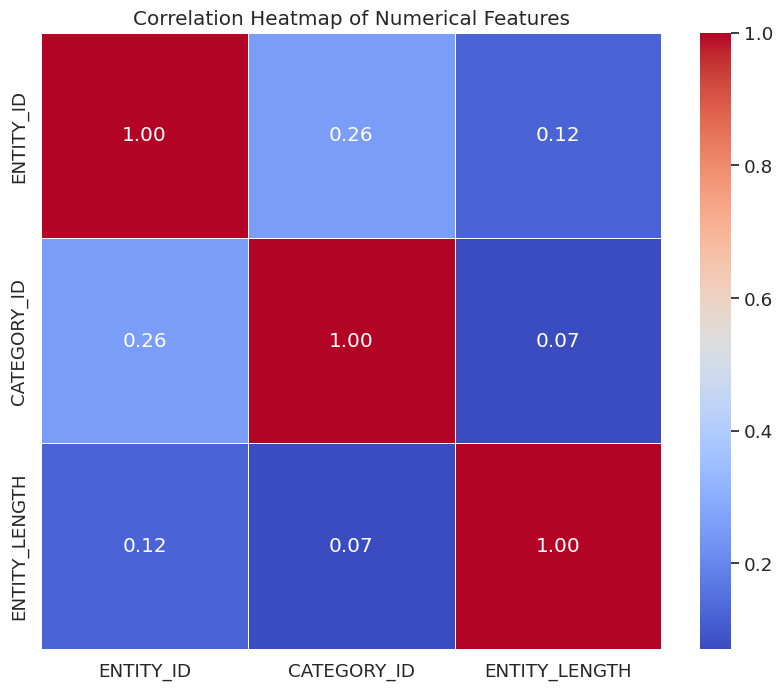

Column 'length' not found in the dataset. Skipping boxplot analysis.
Column 'description' not found for feature engineering.


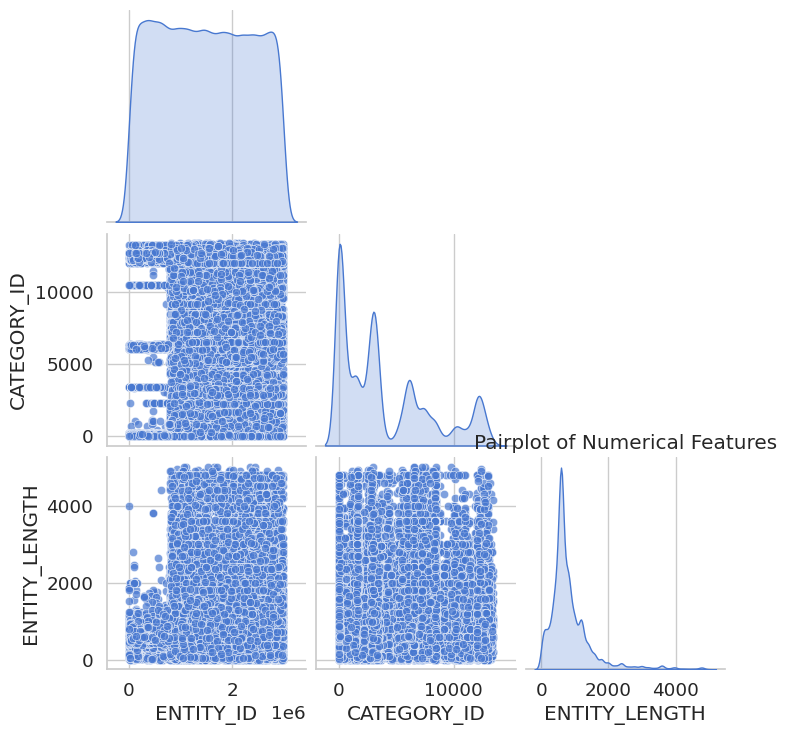

Skipping ENTITY_DESCRIPTION: too many unique values for a meaningful count plot.
Target variable 'your_actual_target_column_name' not found.
Numerical features scaled.


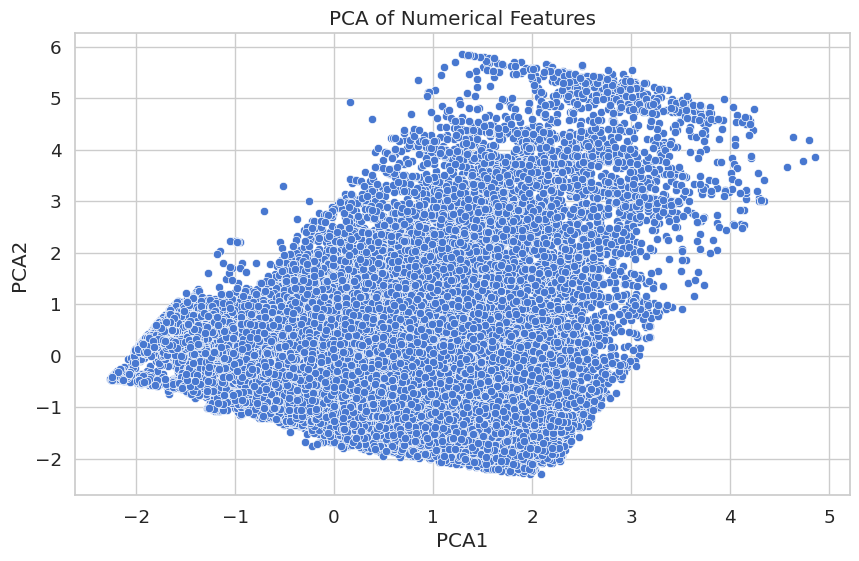

EDA results have been saved to files. Please check the current directory.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set plot style for consistency
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Function to clean CSV lines
def clean_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    with open(file_path, 'w') as file:
        for line in lines:
            if line.count('"') % 2 == 0:  # Ensure quotes are even
                file.write(line)

# Clean CSV files before loading
clean_csv('/content/Train.csv')
clean_csv('/content/Test.csv')

# Load datasets with error handling
try:
    # Use the error_bad_lines parameter to handle inconsistent number of fields
    train_df = pd.read_csv('/content/Train.csv', on_bad_lines='skip')
    test_df = pd.read_csv('/content/Test.csv', on_bad_lines='skip')
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file path and ensure the dataset exists.")
    raise SystemExit(e)

# Step 1: Data Overview - Basic Info and Missing Values Check
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()

# Show missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

# Save missing values report
missing_values_report = pd.DataFrame({
    'Train': missing_values_train,
    'Test': missing_values_test
}).fillna(0)

missing_values_report.to_csv('missing_values_report.csv')

print("\nMissing values in Train Dataset:")
print(missing_values_train[missing_values_train > 0]) if missing_values_train.sum() > 0 else print("No missing values found in the train dataset.")

print("\nMissing values in Test Dataset:")
print(missing_values_test[missing_values_test > 0]) if missing_values_test.sum() > 0 else print("No missing values found in the test dataset.")

# Step 2: Handling missing values - Fill missing values with empty strings
train_df.fillna('', inplace=True)
test_df.fillna('', inplace=True)

# Step 3: EDA - Target Variable Analysis (Length Distribution)
if 'length' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df['length'], kde=True, color='blue', bins=30)
    plt.title('Distribution of Length in Train Dataset')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.axvline(train_df['length'].mean(), color='red', linestyle='--', label='Mean Length')
    plt.legend()
    plt.savefig('length_distribution.png')  # Save the plot
    plt.show()
else:
    print("Column 'length' not found in the dataset. Skipping length analysis.")

# Step 4: EDA - Description and Metadata Text Analysis
if 'description' in train_df.columns and 'metadata' in train_df.columns:
    combined_text = ' '.join(train_df['description'].astype(str) + ' ' + train_df['metadata'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(combined_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Descriptions and Metadata')
    plt.savefig('word_cloud.png')  # Save the word cloud
    plt.show()
else:
    print("Required columns for word cloud analysis are missing.")

# Step 5: Correlation Analysis for Numerical Metadata
numerical_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    corr_matrix = train_df[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.savefig('correlation_heatmap.png')  # Save the heatmap
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis.")

# Step 6: Outliers Detection - Boxplot of Length
if 'length' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df['length'], color='orange')
    plt.title('Boxplot of Length (Outliers Detection)')
    plt.xlabel('Length')
    plt.savefig('length_boxplot.png')  # Save the boxplot
    plt.show()
else:
    print("Column 'length' not found in the dataset. Skipping boxplot analysis.")

# Step 7: Feature Engineering - Length vs Description Length
if 'description' in train_df.columns:
    train_df['description_length'] = train_df['description'].apply(len)

    if 'length' in train_df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='description_length', y='length', data=train_df, color='green')
        plt.title('Description Length vs Length')
        plt.xlabel('Description Length')
        plt.ylabel('Entity Length')
        plt.savefig('description_length_vs_length.png')  # Save scatter plot
        plt.show()
    else:
        print("Column 'length' not found for scatter plot analysis.")
else:
    print("Column 'description' not found for feature engineering.")

# Step 8: Pair Plot of Numerical Features (if any available)
if len(numerical_columns) > 1:
    sns.pairplot(train_df[numerical_columns], corner=True, diag_kind='kde', plot_kws={'alpha': 0.7})
    plt.title('Pairplot of Numerical Features')
    plt.savefig('pairplot_numerical_features.png')  # Save pair plot
    plt.show()
else:
    print("Not enough numerical columns for pairplot analysis.")

# Step 9: Categorical Metadata Analysis - Frequency Plots
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    if train_df[column].nunique() < 50:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column, data=train_df, palette='Set2', order=train_df[column].value_counts().index)
        plt.title(f'Frequency Plot of {column}')
        plt.xticks(rotation=90)
        plt.savefig(f'frequency_plot_{column}.png')  # Save each frequency plot
        plt.show()
    else:
        print(f"Skipping {column}: too many unique values for a meaningful count plot.")

# Step 10: Target Variable Analysis
target_column = 'your_actual_target_column_name'  # Replace with actual target column name

if target_column in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target_column, data=train_df, palette='coolwarm')
    plt.title('Class Imbalance in Target Variable')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.savefig('target_variable_analysis.png')  # Save count plot
    plt.show()
else:
    print(f"Target variable '{target_column}' not found.")

# Step 11: Data Transformation - Scaling Numerical Features
if numerical_columns:
    scaler = StandardScaler()
    train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
    print("Numerical features scaled.")

# Step 12: Data Reduction - PCA for Dimensionality Reduction
if len(numerical_columns) > 1:
    pca = PCA(n_components=2)  # Reducing to 2 components for visualization
    pca_result = pca.fit_transform(train_df[numerical_columns])
    train_df['PCA1'] = pca_result[:, 0]
    train_df['PCA2'] = pca_result[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', data=train_df, hue=target_column if target_column in train_df.columns else None)
    plt.title('PCA of Numerical Features')
    plt.savefig('pca_plot.png')  # Save PCA scatter plot
    plt.show()
else:
    print("Not enough numerical columns for PCA analysis.")

# Save the processed data for further analysis
train_df.to_csv('processed_train_data.csv', index=False)
test_df.to_csv('processed_test_data.csv', index=False)

print("EDA results have been saved to files. Please check the current directory.")


In [6]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful